# OCR Expiry Date and Production Code Detection with EasyOCR

Name: Anthony Kevin Oktavius

In [1]:
! pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.8 MB/s eta 0:00:00


In [1]:
! pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.4 MB/s eta 0:00:00


Download Fonts

In [26]:
! wget https://github.com/jondot/dotfiles/raw/master/.fonts/calibri.ttf

--2023-11-05 15:29:30--  https://github.com/jondot/dotfiles/raw/master/.fonts/calibri.ttf
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jondot/dotfiles/master/.fonts/calibri.ttf [following]
--2023-11-05 15:29:30--  https://raw.githubusercontent.com/jondot/dotfiles/master/.fonts/calibri.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352736 (344K) [application/octet-stream]
Saving to: ‘calibri.ttf’

calibri.ttf         100%[===================>] 344.47K  --.-KB/s    in 0.03s   

2023-11-05 15:29:30 (11.6 MB/s) - ‘calibri.ttf’ saved [352736/352736]



In [28]:
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
from easyocr import Reader

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Set the languages that we'd like to work with.

In [3]:
languages_list = ['en']

Make the process faster by using GPU.

In [4]:
gpu = True

## Data Preparation

In [5]:
! unzip -qq /content/drive/MyDrive/Dataset/Test-OCR.zip

List all of the files for testing.

In [6]:
TEST_OCR_DIR = "Test-OCR"

date_real_paths = list(os.listdir(TEST_OCR_DIR))
print(date_real_paths)

['Image_20231103153842005.bmp', 'Image_20231103154009502.bmp', 'Image_20231103154207260.bmp', 'Image_20231103154101029.bmp', 'Image_20231103153515942.bmp', 'Image_20231103153428429.bmp', 'Image_20231103153733509.bmp', 'Image_20231103153630624.bmp', 'Image_20231103154043801.bmp', 'Image_20231103153649469.bmp']


## Data Modelling

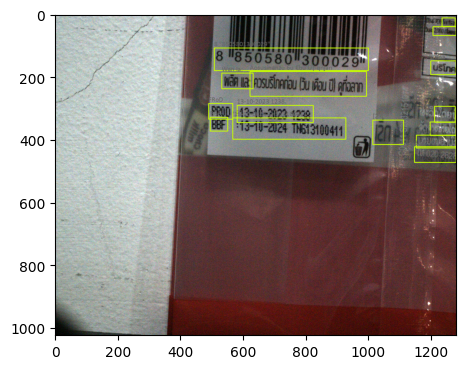

In [30]:
def write_text(text, x, y, image, font, color = (100, 100, 100), font_size = 22):
  font = ImageFont.truetype(font, font_size)
  image_pil = Image.fromarray(image)
  draw = ImageDraw.Draw(image_pil)
  draw.text((x, y - font_size), text, font = font, fill = color)
  image = np.array(image_pil)
  return image

def get_box_coordinates(bounding_box):
  (left_top, right_top, bottom_right, bottom_left) = bounding_box
  left_top = (int(left_top[0]), int(left_top[1]))
  right_top = (int(right_top[0]), int(right_top[1]))
  bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
  bottom_left = (int(bottom_left[0]), int(bottom_left[1]))
  return left_top, right_top, bottom_right, bottom_left

def draw_ocr_box_on_img(image, left_top, bottom_right, color = (200, 255, 0), thickness = 2):
  cv2.rectangle(image, left_top, bottom_right, color, thickness)
  return image

font = '/content/calibri.ttf'

N_ROWS = 2
N_COLS = 5

plt.figure(figsize = (30, 10))
for path_index, path in enumerate(date_real_paths):
  image = Image.open(f"{TEST_OCR_DIR}/{path}")
  image = np.array(image)
  reader = Reader(languages_list, gpu)
  results = reader.readtext(image)
  for (box, text, probability) in results:
    left_top, right_top, bottom_right, bottom_left = get_box_coordinates(box)

    image = draw_ocr_box_on_img(
      image, left_top = left_top, bottom_right = bottom_right,
    )

    plt.subplot(N_ROWS, N_COLS, path_index + 1)
    image = write_text(text, left_top[0], left_top[1], image, font)
    plt.imshow(image)
    # print(results)
  break